### Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

### Importing Data 

In [77]:
import os
os.getcwd()
os.chdir('/Users/hridul.gupta/Desktop/Maverick AI Repo/workbench/datasets/')
os.getcwd()

'/Users/hridul.gupta/Desktop/Maverick AI Repo/workbench/datasets'

In [78]:
# read in data
df = pd.read_csv('creditcard.csv')

### Data Exploration

In [79]:
print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [81]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [82]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

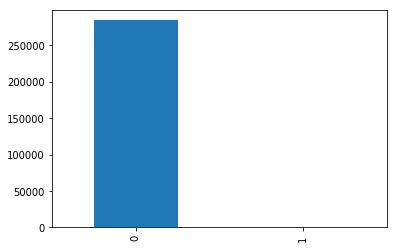

In [83]:
df['Class'].value_counts().plot.bar()

In [84]:
# Prepare data for modeling
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [85]:
def evaluation(model, X_train, X_test):
    
    Y_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)
    Y_prob = model.predict_proba(X_test)[:,1]
    Y_train_prob = model.predict_proba(X_train)[:,1]

    print("--- ROC AUC ---")
    print("Training Set:", roc_auc_score(y_train, Y_train_prob))
    print("Test Set:", roc_auc_score(y_test, Y_prob))
    
    print("\n--- Accuracy ---")
    print("Training Set:", model.score(X_train, y_train))
    print("Test Set:", model.score(X_test, y_test))

    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    print("\n--- Confusion Matrix ---")
    print("True Positive:", tp)
    print("False Negative:", fn)
    print("True Negative:", tn)
    print("False Positive:", fp)

    print("\n--- Precision ---")
    print("Training Set:", precision_score(y_train, Y_train_pred))
    print("Test Set:", precision_score(y_test, Y_pred))

    print("\n--- Recall ---")
    print("Training Set:", recall_score(y_train, Y_train_pred))
    print("Test Set:", recall_score(y_test, Y_pred))

    print("\n--- F1 Score ---")
    print("Training Set:", f1_score(y_train, Y_train_pred))
    print("Test Set:", f1_score(y_test, Y_pred))

def plot_ROC(model, X_test):    
    Y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(y_test, Y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_test, Y_prob)
    fig = plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Area = {:.2f})'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()

# Baseline Model

In [86]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc_base = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc_base.predict(X_test)

In [61]:
evaluation(rfc_base, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9999996808574384
Test Set: 0.912607235290857

--- Accuracy ---
Training Set: 0.9999110507712834
Test Set: 0.9995505744220669

--- Confusion Matrix ---
True Positive: 102
False Negative: 30
True Negative: 71068
False Positive: 2

--- Precision ---
Training Set: 1.0
Test Set: 0.9807692307692307

--- Recall ---
Training Set: 0.9472222222222222
Test Set: 0.7727272727272727

--- F1 Score ---
Training Set: 0.9728958630527818
Test Set: 0.864406779661017


# Oversampling Minority Class

In [62]:
from sklearn.utils import resample

In [87]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [88]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

Time        V1        V2        V3        V4        V5        V6  \
264873  161634.0 -0.395578  1.489129 -0.833442 -0.224271  0.369444 -1.453886   
163821  116237.0  1.950487  0.002312 -1.761814  1.232470  0.523175 -0.650657   
72083    54557.0  1.105167 -0.166253  0.569520  0.681043 -0.259189  0.642792   
196949  131771.0  1.805238  0.961264 -1.717212  4.094625  0.938666 -0.227785   
126213   77959.0  0.835421 -1.191847  0.578455  0.586101 -1.236663  0.194617   

              V7        V8        V9  ...       V21       V22       V23  \
264873  0.796593 -0.060403  0.338270  ...  0.231624  0.955194 -0.172092   
163821  0.504231 -0.200857  0.116805  ...  0.086306  0.326297 -0.068839   
72083  -0.437034  0.356746  0.441417  ...  0.009073  0.293023 -0.028688   
196949  0.152911  0.066753 -1.073784  ... -0.137875 -0.450959  0.098530   
126213 -0.532404  0.061561 -0.734344  ... -0.072349 -0.109154 -0.308356   

             V24       V25       V26       V27       V28  Amount  Class  
264873 -0.041050 -0.313444 -0.174301  0.064657 -0.036960    2.74      0  
163821 -0.416589  0.426044 -0.486299 -0.031266 -0.072543   38.44      0  
72083  -0.242206  0.389813  0.482852  0.010705 -0.008399    1.00      0  
196949 -0.662272 -0.150154 -0.098852 -0.000030  0.017622   37.89      0  
126213  0.011968  0.461350 -0.244810  0.031845  0.060910  237.00      0  

[5 rows x 31 columns]

In [89]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [90]:
from sklearn.ensemble import RandomForestClassifier

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

# train model
rfc_over = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc_over.predict(X_test)

In [68]:
evaluation(rfc_over, X_train, X_test)

--- ROC AUC ---
Training Set: 1.0
Test Set: 0.9276856257808136

--- Accuracy ---
Training Set: 0.9999953105582781
Test Set: 0.9995505744220669

--- Confusion Matrix ---
True Positive: 103
False Negative: 29
True Negative: 71067
False Positive: 3

--- Precision ---
Training Set: 0.9999906212045186
Test Set: 0.9716981132075472

--- Recall ---
Training Set: 1.0
Test Set: 0.7803030303030303

--- F1 Score ---
Training Set: 0.9999953105802688
Test Set: 0.8655462184873949


# Undersampling Majority Class

In [91]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [92]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

# train model
rfc_under = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc_under.predict(X_test)

In [93]:
evaluation(rfc_under, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9998842592592593
Test Set: 0.9723615428237632

--- Accuracy ---
Training Set: 0.9930555555555556
Test Set: 0.9825285806578467

--- Confusion Matrix ---
True Positive: 114
False Negative: 18
True Negative: 69844
False Positive: 1226

--- Precision ---
Training Set: 1.0
Test Set: 0.08507462686567165

--- Recall ---
Training Set: 0.9861111111111112
Test Set: 0.8636363636363636

--- F1 Score ---
Training Set: 0.993006993006993
Test Set: 0.15489130434782608


# SMOTE

In [94]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [95]:
# train model
rfc_smote = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc_smote.predict(X_test)

In [75]:
evaluation(rfc_smote, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9999999991863381
Test Set: 0.945480821298677

--- Accuracy ---
Training Set: 0.9999906211165561
Test Set: 0.9995084407741356

--- Confusion Matrix ---
True Positive: 109
False Negative: 23
True Negative: 71058
False Positive: 12

--- Precision ---
Training Set: 0.9999812425849594
Test Set: 0.9008264462809917

--- Recall ---
Training Set: 1.0
Test Set: 0.8257575757575758

--- F1 Score ---
Training Set: 0.9999906212045188
Test Set: 0.8616600790513834
